# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## InceptionV3

In [5]:
base_model_inceptionV3 = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

87916544/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in base_model_inceptionV3.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_inceptionV3.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_inceptionV3.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 250s 2s/step - loss: 2.1579 - accuracy: 0.8609 - val_loss: 0.2030 - val_accuracy: 0.9648
Epoch 2/100
114/114 [==============================] - 165s 1s/step - loss: 0.0983 - accuracy: 0.9762 - val_loss: 0.4732 - val_accuracy: 0.9143
Epoch 3/100
114/114 [==============================] - 162s 1s/step - loss: 0.1185 - accuracy: 0.9685 - val_loss: 0.3345 - val_accuracy: 0.9297
Epoch 4/100
114/114 [==============================] - 165s 1s/step - loss: 0.0881 - accuracy: 0.9754 - val_loss: 0.1214 - val_accuracy: 0.9714
Epoch 5/100
114/114 [==============================] - 168s 1s/step - loss: 0.0867 - accuracy: 0.9770 - val_loss: 0.1081 - val_accuracy: 0.9758
Epoch 6/100
114/114 [==============================] - 167s 1s/step - loss: 0.1185 - accuracy: 0.9704 - val_loss: 0.1039 - val_accuracy: 0.9736
Epoch 7/100
114/114 [==============================] - 170s 1s/step - loss: 0.0882 - accuracy: 0.9792 - val_loss: 0.0997 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 36s 2s/step - loss: 0.0083 - accuracy: 0.9978
test loss, test acc: [0.008343911729753017, 0.997802197933197]


## Plotting 

In [12]:
history.history

{'loss': [0.921911358833313,
  0.11028125137090683,
  0.10857751965522766,
  0.08115675300359726,
  0.07885433733463287,
  0.08845088630914688,
  0.09977371990680695,
  0.06621981412172318,
  0.05158216506242752,
  0.05757012963294983,
  0.06170313432812691,
  0.06529060006141663,
  0.07011320441961288,
  0.047155674546957016,
  0.047249771654605865,
  0.0343654602766037,
  0.052529942244291306,
  0.04018309339880943,
  0.050637274980545044,
  0.03260922059416771,
  0.02372453548014164,
  0.044454094022512436,
  0.039495378732681274,
  0.03390243276953697,
  0.038478098809719086,
  0.03707948327064514,
  0.03039286844432354,
  0.03010737895965576,
  0.08000316470861435,
  0.029007816687226295,
  0.03494035452604294,
  0.03586188331246376,
  0.024289237335324287,
  0.03944965824484825,
  0.033845774829387665,
  0.022699259221553802,
  0.022501563653349876,
  0.022768042981624603,
  0.03452804684638977,
  0.027494512498378754,
  0.02851240336894989,
  0.032443903386592865,
  0.0320555306

### Accuracy vs Epochs

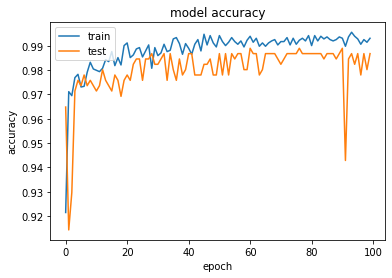

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

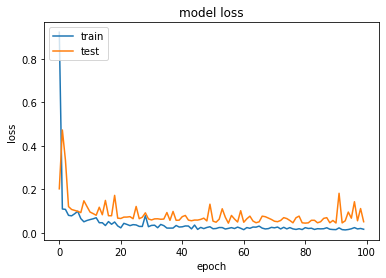

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()